In [2]:
import pandas as pd 
from igraph import *
import numpy as np

# Analyse de réseaux sociaux

In [3]:
df = pd.read_csv("twitter_10M.csv", sep=' ')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
dest      10000 non-null int64
source    10000 non-null int64
dtypes: int64(2)
memory usage: 156.3 KB


In [4]:
g = Graph.Read_Ncol("twitter_10M.csv", directed=True)
plot(g)

## Propriétés de la séléction aléatoire de 10000 noeuds d'un graphe orienté en comprenant 10000

In [5]:
## Analyse des composantes connexes
print("Ordre du graphe:", len(g.vs))
print("Taille du graphe:", len(g.es))
print("Nombre de composantes connexes:", len(g.clusters()))

Ordre du graphe: 5362
Taille du graphe: 10001
Nombre de composantes connexes: 4462


### Analyse des degrés

In [12]:
print("Degré maximum:", max(g.degree()))
print("Degré minimum:", min(g.degree()))
m = sum(g.degree())/2
print("Taille du graphe:", m)
dm = m / len(g.degree())
print("Degré moyen:", dm)
# Vérification du degré moyen dans le cas d'un graphe dirigé
d_in = sum(g.degree(mode="in"))/len(g.degree())
d_out = sum(g.degree(mode="out"))/len(g.degree())
print("Vérification du degré moyen dans le cas d'un graphe dirigé:",d_in ==  d_out == dm)


Degré maximum: 324
Degré minimum: 1
Taille du graphe: 10001.0
Degré moyen: 1.8651622528907124
Vérification du degré moyen dans le cas d'un graphe dirigé: True


In [7]:
sources = np.argwhere(np.array(g.degree(mode="in"))==0)
print("Nombre de sources:", len(sources))
puits = np.argwhere(np.array(g.degree(mode="out"))==0)
print("Nombre de puits:", len(puits))

Nombre de sources: 2782
Nombre de puits: 979


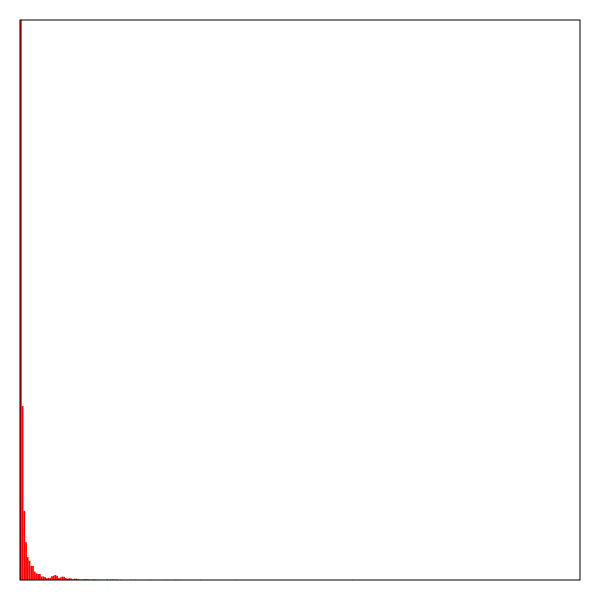

In [11]:
# Probabilité des sommets
distri = g.degree_distribution()
plot(Histogram(data=g.degree()))

In [16]:
# Déterminer si le réseaux est possiblement réél à partir de sa densité
n = len(g.vs)
mmax =  (n*(n-1))/2
print("Nombre de liens maximum:", mmax)
print("{} << {} , cette propriété est vérifiée.".format(m, mmax))

Nombre de liens maximum: 14372841.0
10001.0 << 14372841.0 , cette propriété est vérifiée.


In [17]:
#Etude des chemins et des distances
# Diamètre (longueur le plus long)
# Longueur moyenne
# Chemin Eulérien ? (traverse chaque arrête exactement une fois)
# Chemin Hamiltonien ? (traverse chaque sommet exactement une fois)


In [19]:
# Connexité fortement ou faiblement ? Composantes ? isthme

In [20]:
# Existe t'il une composante géante ? Elle doit occuper une fraction significative du graphe

In [21]:
# Coefficient de Clustering moyen (effet petit groupe)
# Coefficient de clustering global (proportion de triangles fermés dans le réseaux)

In [ ]:
# Propriétés d'un vrai réseaux
# Petit nombre de voisins, degré faible mais certains avec un très haut degré, suit une loi de puissances. Invariant d'échelle
# Fort coefficient de clustering
# Faible distance pour la plupart des noeuds
